### Neural Network

 공부와 수면시간과 성적의 관계를 통해 가장 기본적 딥러닝 모델을 numpy를 통해 구축해보자
   
 <b>참고</b>  
 https://www.youtube.com/watch?v=bxe2T-V8XRs&list=RDCMUConVfxXodg78Tzh5nNu85Ew&index=5

#### step 1 - 데이터 정의
   
x - 공부시간, 수면시간  
y - 성적

In [2]:
import numpy as np

x = np.array([[3, 5],[5, 1],[10, 2]])
y = np.array([[0.75], [0.82], [0.93]])


#### step2 - forward propagation
 forward propagation 은 아래 (1), (2), (3), (4) 수식을 걸쳐서 이루어진다.  
 모델구조는 hidden layer - 1, neural - 3로 구성되며 f는 활성함수(activation function)으로 sigmoid를 사용할 것이다.

 $$z_2 = XW_1 \ (1)$$
 $$a_2 = f(z_2) \ (2)$$
 $$z_3 = a_2W_2 \ (3)$$
 $$ \hat y = f(z_3) \ (4)$$
 $$loss = L(y,\hat y) \ (5)$$

In [3]:
class Neural_Network(object):
    def __init__(self, input_layer_size, output_layer_size, hidden_layer_size):
        self.input_layer_size = input_layer_size
        self.output_layer_size = output_layer_size
        self.hidden_layer_size = hidden_layer_size
        self.W1 = np.random.randn(self.input_layer_size, self.hidden_layer_size)
        self.W2 = np.random.randn(self.hidden_layer_size, self.output_layer_size)
        
    def forward(self, X):
        z2 = X.dot(self.W1)
        a2 = self.sigmoid(z2)
        z3 = a2.dot(self.W2)
        y_hat = self.sigmoid(z3)
        return y_hat
    
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))

    
def MSE(y, y_hat):
    return np.power(y-y_hat,2)/2
        

In [4]:
nn = Neural_Network(2,1,3)
loss = MSE(y, nn.forward(x))
loss

array([[0.20678026],
       [0.21685699],
       [0.31597501]])

#### step3 - back propagation  
 
 각 weghit 변수 마다 gradient를 적용하여 loss가 가장 적은 weghit 값을 찾아야한다.  
 gradinet를 사용하는 이유는 모든 weghit를 전체 탐사하여 최적점을 찾기에는 비용(시간)이 기하급수적으로 늘어난다.    
 gredient를 통해 각 loss를 최소화 시키는 w 방향(기울기)를 찾아 조절함을 통해 최소한의 비용으로 모델 최적화를 이뤄낸다.  
 결국 loss를 구하고 해당 loss를 최소화 시키는 w2를 구하고 w2를 최적화 시키는 w1을 구하는 식으로 output layer로 부터 input layer까지 역으로 w 값 최적화를 진행한다.   
 이러한 방법을 back propagation이라고 한다.


$$ {\partial \ loss \over \partial \ W1} = \left[
\begin{matrix}
    {\partial \ loss \over \partial \ w_{11}} & {\partial \ loss \over \partial \ w_{12}} & {\partial \ loss \over \partial \ w_{13}} \\
    {\partial \ loss \over \partial \ w_{21}} & {\partial \ loss \over \partial \ w_{22}} & {\partial \ loss \over \partial \ w_{23}} \\
\end{matrix}
\right] $$

$$ {\partial \ loss \over \partial \ W2} = \left[
\begin{matrix}
    {\partial \ loss \over \partial \ w_{11}}  \\
    {\partial \ loss \over \partial \ w_{21}}  \\
    {\partial \ loss \over \partial \ w_{31}}  \\
\end{matrix}
\right] $$

#### step3_1 - sum rule in differentiation
 loss 를 구하기 위한 MSE 수식을 가져온다.   
 미분의 합은 합의 미분과 같기 때문에 미분을 취하고 합을 취해도 된다.
 
 $${\partial \ loss \over \partial \ W_2} = {\partial \sum {1 \over 2} (y - \hat y)^2 \over \partial W_2} $$
   
 $${\partial \ loss \over \partial \ W_2} = \sum{\partial \ {1 \over 2} (y - \hat y)^2 \over \partial W_2} $$
 
#### step3_2 - chain rule1
  아래 chain rule 수식을 이용하여 loss 함수의 제곱을 제거해준다.
    
 $$ ======================== 베이스수식 ========================  $$
   
 $$(g \cdot x)^\prime = (g \cdot x)g^\prime$$
   
 $$ex) {\partial x \over \partial}(3x^2+7x)^2 = 2(3x^2+7x)(6x+7)$$
 
$$ ======================== 아래 적용 ========================  $$
 
 $${\partial \ loss \over \partial \ W_2} = 2* {1 \over 2} (y-\hat y)({y \over \partial W_2} - {\hat y \over \partial W_2})$$
   
  $${\partial \ loss \over \partial \ W_2} =  1 (y-\hat y)(0 - {\hat y \over \partial W_2})$$
  
  $${\partial \ loss \over \partial \ W_2} =  -(y-\hat y)({\hat y \over \partial W_2})$$
 
#### step3_3 - chain rule 2
  
 $$ ======================== 베이스수식 ========================  $$
 
 $${\partial y \over \partial x} = {\partial y \over \partial z}\cdot{\partial z \over \partial x}$$
   
$$ ======================== 아래 적용 ========================  $$
   
 $${\partial \ loss \over \partial \ W_2} =  -(y-\hat y)({\partial \hat y \over \partial z_3}\cdot{\partial z_3 \over \partial W_2})$$
   
 $$ {\partial \hat y \over \partial z_3} = {\partial f(z_3) \over \partial z_3}$$
   
   
#### step3_4 - f(z_3) 미분 (sigmoid)

 $$ ======================== 베이스수식 ========================  $$
  
 $$ f(x) = {u \over v} $$ 
   
 $$ f^\prime(x) = {u^\prime v - uv^\prime \over v^2} $$ 
 
 $$ ======================== 아래 적용 ========================  $$
   
 $$ f(z) = {1 \over 1+e^{-z}}$$ 
   
 $$ f^\prime(z) = {0(1+e^{-z}) - 1(0-e^{-z}) \over (1+e^{-z})^2}$$
   
 $$ f^\prime(z) =  {e^{-z} \over (1+e^{-z})^2}$$

  $${\partial \ loss \over \partial \ W_2} =  -(y-\hat y)( \ f^\prime(z_3)\cdot{\partial z_3 \over \partial W_2} \ )$$
    

In [5]:
import matplotlib.pyplot as plt

def sigmoid_prime(z):
    return np.exp(-z)/np.power(1+np.exp(-z),2)

def sigmoid(z):
        return 1/(1+np.exp(-z))

sig = sigmoid(np.array([i for i in range(-10, 10)]))
sig_prime = sigmoid_prime(np.array([i for i in range(-10, 10)]))

plt.title('sigmoid differentiation')
plt.plot(sig)
plt.plot(sig_prime)
plt.show()


<Figure size 640x480 with 1 Axes>

#### step3_5 - w2 미분값 추출

 $$ ======================== 베이스수식 ========================  $$
   
 $$ 1차 함수의 미분  $$
   
 $$ {\partial \ aw \over \partial \ w}  = a^T $$
 
 $$ ======================== 아래 적용 ========================  $$
 
 $${\partial \ loss \over \partial \ W_2} =  -(y-\hat y)( \ f^\prime(z_3)\cdot{\partial z_3 \over \partial W_2} )$$
  
 $${\partial \ loss \over \partial \ W_2} =  -(y-\hat y)( \ f^\prime(z_3)\cdot{\partial \ a_2W_2 \over \partial W_2} )$$
   
  $${\partial \ loss \over \partial \ W_2} =  -{a_2^T}\cdot(y-\hat y)\ f^\prime(z_3)$$
  
  
#### step3_6 - w1 미분값 추출
  $${\partial \ loss \over \partial \ W_1} = -(y-\hat y) \ ({\partial \hat y \over W_1}) = -(y-\hat y)({\partial \hat y \over \partial z_3} \cdot {\partial z_3 \over \partial a_2} \cdot {\partial a_2 \over \partial z_2} \cdot {\partial  z_2 \over \partial W_1})$$
  
  $${\partial \ loss \over \partial \ W_1} = -(y-\hat y)({\partial f(z_3) \over \partial z_3} \cdot {\partial (a_2 \cdot W_2) \over \partial a_2} \cdot {\partial f(z_2) \over \partial z_2} \cdot {\partial  (X \cdot W_1) \over \partial W_1})$$
    
  $${\partial \ loss \over \partial \ W_1} = -(y-\hat y)({f^\prime(z_3)} \cdot { W_2^T} \cdot {f^\prime(z_2)} \cdot {\partial  (X \cdot W_1) \over \partial W_1})$$
    
  $${\delta_1 = -(y-\hat y)\ f^\prime(z_3)}$$
    
  $${\delta_2 = \delta_1 \cdot { W_2^T} \cdot {f^\prime(z_2)}}$$
  
  $${\partial \ loss \over \partial \ W_1} = \delta_2{\partial  (X \cdot W_1) \over \partial W_1}= X^T \cdot \delta_2$$
    



In [6]:
### step code
x = np.array([[3, 5],[5, 1],[10, 2]])
y = np.array([[0.75], [0.82], [0.93]])
w1 = np.random.randn(2,4)
w2 = np.random.randn(4,1)


z1 = x.dot(w1)
a1 = sigmoid(z1)
z2 = a1.dot(w2) 
y_hat = sigmoid(z2)
loss = MSE(y,y_hat)/2


delta1 = (y_hat-y)*sigmoid_prime(z2)
w2_gred = a1.T.dot(delta1)

delta2 = np.dot(delta1, w2.T) * sigmoid_prime(z1)
w1_gred = np.dot(x.T, delta2)



In [7]:
### step code Class
class Neural_Network(object):
    def __init__(self, input_layer_size, output_layer_size, hidden_layer_size):
        self.input_layer_size = input_layer_size
        self.output_layer_size = output_layer_size
        self.hidden_layer_size = hidden_layer_size
        self.W1 = np.random.randn(self.input_layer_size, self.hidden_layer_size)
        self.W2 = np.random.randn(self.hidden_layer_size, self.output_layer_size)
        
    def forward(self, X):
        lr = 3
        ### forward propagation
        self.z2 = X.dot(self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = self.a2.dot(self.W2)
        y_hat = self.sigmoid(self.z3)
        
        return y_hat
    
    def cost_function_prime(self, X, y):
        y_hat = self.forward(X)
        loss = self.MSE(y, y_hat)
        
        delta1 = np.multiply(-(y-y_hat), self.sigmoid_prime(self.z3))
        w2_grad = np.dot(self.a2.T, delta1)
        
        delta2 = np.multiply(np.dot(delta1, self.W2.T), sigmoid_prime(self.z2))
        w1_grad = np.dot(X.T, delta2)
        return w1_grad, w2_grad
    
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
    
    def MSE(self, y, y_hat):
        return np.power((y-y_hat),2)/2
    
    def sigmoid_prime(self, z):
        return np.exp(-z)/np.power(1+np.exp(-z),2)


epoch:0, loss:0.059483809981829304
epoch:10, loss:0.01001253958307459
epoch:20, loss:0.003540364120558599
epoch:30, loss:0.0029993923356561435
epoch:40, loss:0.0026957455644688153


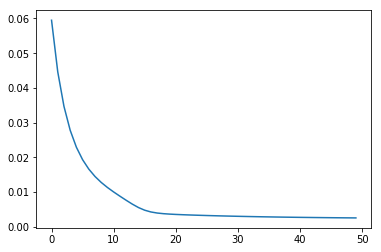

In [8]:
input_layer_size = x.shape[1]
output_layer_size = y.shape[1]
hidden_layer_size = 4
epoch = 50

model = Neural_Network(input_layer_size, output_layer_size, hidden_layer_size)
loss_list = []

for i in range(epoch):
    y_hat = model.forward(x)
    w1_grad, w2_grad = model.cost_function_prime(x,y)
    model.W1 -= w1_grad
    model.W2 -= w2_grad
    loss = model.MSE(y, y_hat)
    loss_list.append(loss.sum())
    if i % 10 == 0:
        print(f'epoch:{i}, loss:{loss.sum()}')
        
plt.plot(loss_list)
plt.show()


#### 연습 -  hidden layer를 1개 추가해보기

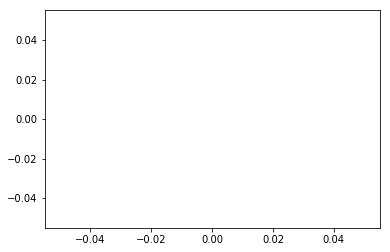

In [9]:
### step code
x = np.array([[3, 5],[5, 1],[10, 2]])
y = np.array([[0.75], [0.82], [0.93]])
w1 = np.random.randn(2,4)
w2 = np.random.randn(4,4)
w3 = np.random.randn(4,1)
loss_list = []

for i in range(100):
    z1 = x.dot(w1)
    a1 = sigmoid(z1)
    z2 = a1.dot(w2) 
    a2 = sigmoid(z2)
    z3 = a2.dot(w3)
    y_hat = sigmoid(z3)
    loss = MSE(y,y_hat)/2
    
    delta1 = (y_hat-y)*sigmoid_prime(z3)
    w3_gred = a2.T.dot(delta1)
    break

    delta2 = np.dot(delta1, w3.T) * sigmoid_prime(z2)
    w2_gred = np.dot(a1.T, delta2)

    delta3 = np.dot(delta2, w2.T) * sigmoid_prime(z1)
    w1_gred = np.dot(x.T, delta3)

    w3 -= w3_gred
    w2 -= w2_gred
    w1 -= w1_gred
    loss_list.append(loss.sum())
    if i % 10 == 0:
        print(f'epoch:{i}, loss:{loss.sum()}')
        
plt.plot(loss_list)
plt.show()



In [11]:
delta1 = (y_hat-y)*sigmoid_prime(z3)
w3_gred = a2.T.dot(delta1)
w3_gred

array([[-0.33065094],
       [-0.08333034],
       [-0.0624064 ],
       [-0.30055041]])

In [13]:
a2.T.dot(sigmoid_prime(z3))

array([[0.64878171],
       [0.16695085],
       [0.1221006 ],
       [0.58672948]])

In [15]:
(y_hat-y)

array([[-0.4332014 ],
       [-0.49263458],
       [-0.60191466]])

#### 연습2 - activation function relu로 변경

In [190]:
def relu(z):
    x = z.copy()
    x[x<0] = 0
    return x

def relu_prime(z):
    p = np.zeros_like(z)
    p[z>0] = 1
    return p


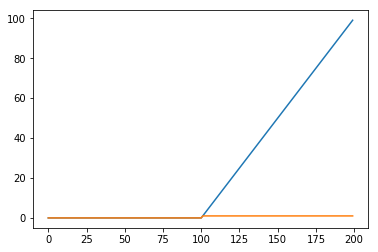

In [191]:
plt.plot(relu(np.array([i for i in range(-100,100)])))
plt.plot(relu_prime(np.array([i for i in range(-100,100)])))
plt.show()


epoch:0, loss:0.3474521425942446
epoch:10, loss:0.24090152245599786
epoch:20, loss:0.17697122264605328
epoch:30, loss:0.15752464918444603
epoch:40, loss:0.1503371131846746
epoch:50, loss:0.1469345317053783
epoch:60, loss:0.1450458758766114
epoch:70, loss:0.14388364069893994
epoch:80, loss:0.1431159892973939
epoch:90, loss:0.14258239678940088


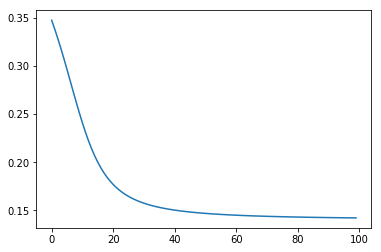

In [217]:
### step code
x = np.array([[3, 5],[5, 1],[10, 2]])
y = np.array([[0.75], [0.82], [0.93]])
w1 = np.random.randn(2,4)
w2 = np.random.randn(4,8)
w3 = np.random.randn(8,1)
loss_list = []
lr = 1e-4

for i in range(100):
    z1 = x.dot(w1)
    a1 = relu(z1)
    z2 = a1.dot(w2) 
    a2 = relu(z2)
    z3 = a2.dot(w3)
    y_hat = sigmoid(z3)
    loss = MSE(y,y_hat)/2
    
    delta1 = (y_hat-y)*sigmoid_prime(z3)
    w3_gred = a2.T.dot(delta1)

    delta2 = np.dot(delta1, w3.T) * leru_prime(z2)
    w2_gred = np.dot(a1.T, delta2)

    delta3 = np.dot(delta2, w2.T) * leru_prime(z1)
    w1_gred = np.dot(x.T, delta3)

    w3 -= w3_gred * lr
    w2 -= w2_gred * lr
    w1 -= w1_gred * lr
    loss_list.append(loss.sum())
    if i % 10 == 0:
        print(f'epoch:{i}, loss:{loss.sum()}')
        
plt.plot(loss_list)
plt.show()

